In [ ]:
#Кумакешв Ф.В. @wewastetimefaded ТФэ-01-21 

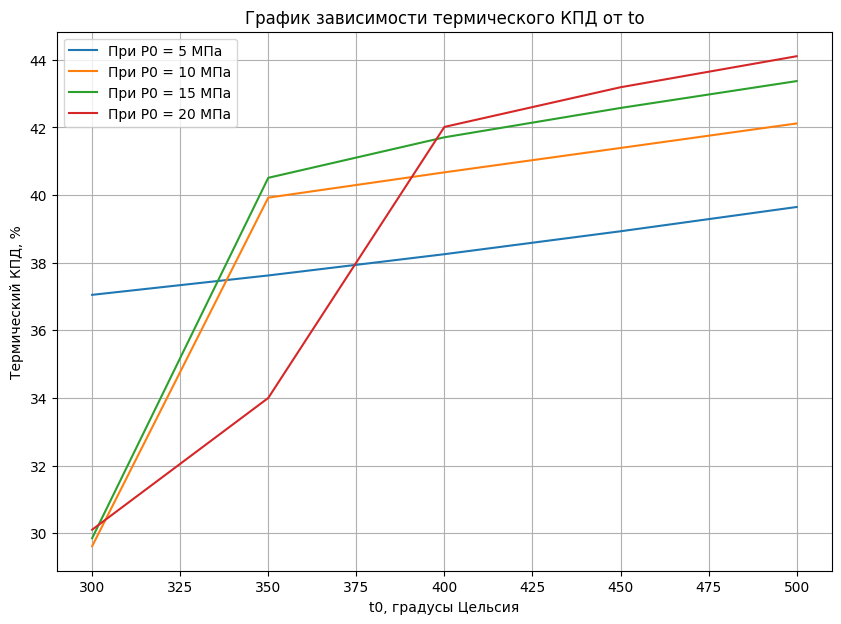

In [7]:
#Задача 1

import numpy as np
import matplotlib.pyplot as plt
import iapws 
from iapws import IAPWS97 as gas

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
grad_Cels = 1

p_O = [5, 10 , 15 , 20] * MPa
t_O = [300, 350, 400, 450 ,500]
p_k = 5 * kPa

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
for P_O in p_O[:4]:
    efficiency = []
    for T_O in t_O[:5]:
        point_0 = gas(P = P_O, T = (T_O + 273.15)) 
        point_condenser_inlet = gas (P = (p_k * unit) , s=point_0.s)
        point_pump_outlet = gas (P= (p_k * unit), x=0)
        useful_energy = point_0.h - point_condenser_inlet.h
        full_energy = point_0.h - point_pump_outlet.h
        efficiency_value = (useful_energy / full_energy)*100
        efficiency.append(efficiency_value)
    graf.set_title("График зависимости термического КПД от to")
    graf.set_xlabel("t0, градусы Цельсия")
    graf.set_ylabel("Термический КПД, %")
    graf.plot(t_O[:5],efficiency[:5], label=f"При P0 = {P_O} МПа")
graf.grid()
graf.legend();

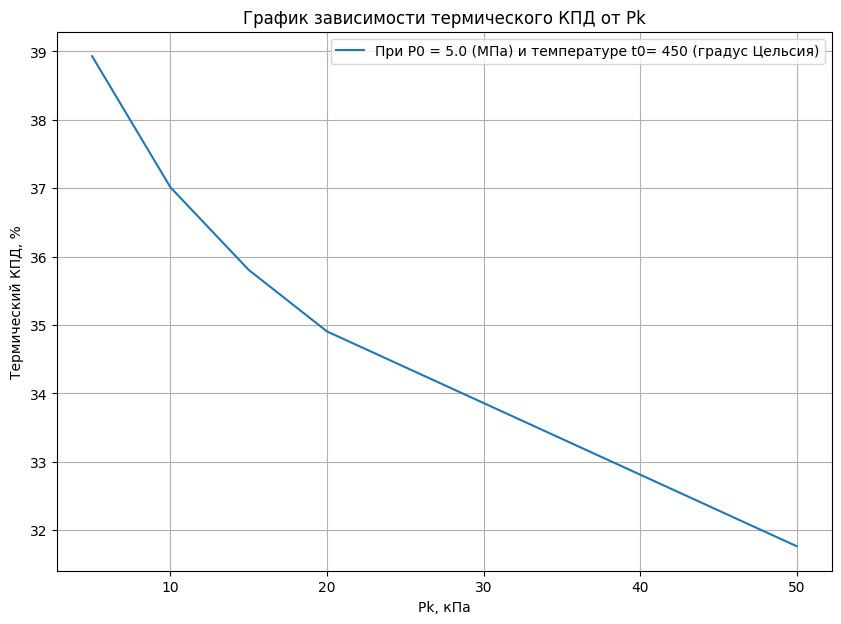

In [13]:
#Задача 2

MPa = 10 ** 6
kPa = 10 ** 3
unit_dly_MPa = 1 / MPa
unit_dly_KPa = kPa / MPa
grad_Cels = 1

p_O = 5 * MPa
t_O = 450 * grad_Cels
p_k = [5, 10, 15, 20, 50] * kPa

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
efficiency = []
for P_k in p_k:
    point_0 = gas (P = p_O * unit_dly_MPa, T = (t_O + 273.15))
    point_condenser_inlet = gas (P = P_k * unit_dly_KPa, s=point_0.s)
    point_pump_outlet = gas (P = (P_k * unit_dly_KPa), x=0)
    useful_energy = point_0.h - point_condenser_inlet.h
    full_energy = point_0.h - point_pump_outlet.h
    efficiency_value = (useful_energy / full_energy)*100
    efficiency.append(efficiency_value)
graf.set_title("График зависимости термического КПД от Pk")
graf.set_xlabel("Pk, кПа")
graf.set_ylabel("Термический КПД, %")
graf.plot(p_k[:5],efficiency[:5], label=f"При P0 = {p_O * unit_dly_MPa } (МПа) и температуре t0= {t_O} (градус Цельсия)")
graf.grid()
graf.legend();